# 6.2 2D Homographies

A 2D homography is a very general linear transformation between planes. In the previous notebook we applied rotations and translations to 3D points, which are of 3D euclidean homographies.

Any two images of the same planar surface in space are related by a homography. This has many practical applications, such as image rectification, image registration, etc. For 2D homographies, we have a $3x3$ matrix containing the linear transformation:$\\[010pt]$

$\hspace{8cm} \begin{bmatrix} a &amp; b &amp; c \\ d &amp; e &amp; f \\ g &amp; h &amp; 1 \end{bmatrix}  \begin{bmatrix} x \\ y \\  1\end{bmatrix} =  \begin{bmatrix} u \\ v \\  w\end{bmatrix}\hspace{2cm} \begin{array}{rcr} x' = u\ /\ w \\ y' = v \ / \ w \end{array}\\[5pt] $ 

<img src="./images/intro_homography.png" width="400">$\\[5pt]$

**In this notebook we will learn:**

- different types of homography
- how to solve a homography in 2D
- when a homography can be applied

## Problem context - Homography in american football

American football is a team sport played by two teams of eleven players on a rectangular field with goalposts at each end. For our practise, we only need to know some points about this sport:  

- The offense (the team with possession of the football) has 4 tries (called downs) for making the ball advance at least 10 yards (approx 9 meters). 
- If a player pass the **down line** (yellow) with the ball, the offense have another 4 tries to advance 10 yards (from the point where the football was lost). 
- **On television, a yellow line is electronically superimposed on the field to show the first down line to the viewing audience. Also, a blue line is superimposed showing where the play (the football) starts.**:$\\[10pt]$

<img src="./images/example_football.jpg" width="500">$\\[3pt]$

As you can see in the image above, the offense is in the **3rd try** for advancing 10 yards (they advanced 5 yards in previous tries, so **the objective is 5 yards**). That information is given by a rectangle placed in the field showing **3rd (try) &amp; 5 (yards to go)**.

Our objective in this notebook is to **place the blue line** (where the ball starts), the **yellow line** (down line) and the placed **rectangle** (which gives to the audience some information) **using homographies**.

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
from ipywidgets import interact, fixed, widgets
from math import cos,sin,pi

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
images_path = './images/'

## 6.2.1 2D homography hierarchy levels

But let's start from the beginning. All 2D homographies are linear transformation of 2D points, but there is a hierarchy level where we can distinguish different types of homographies (and, hence, transformations):$\\[10pt]$

<img src="./images/types.png" width="650">$\\[5pt]$

**<span style="color: blue;">LEVEL 1: Translation</span>**$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} 1 &amp; 0 &amp; t_x \\ 0 &amp; 1 &amp; t_y \\ 0 &amp; 0 &amp; 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}x + t_x \\ y + t_y \\ 1 \end{bmatrix}\\[5pt]$$

Translation is the most simple homography, since pixels of the plane are **only shifted** in both $X$ and $Y$ direction.

**<span style="color: red;">ASSIGNMENT 1 -- </span>** 

Your first task is to define a transformation matrix `M` (*float64 numPy matrix*) that applies an arbitrary translation to the image `football.jpg`. You can apply a homography to an image using [cv2.warpPerspective](https://docs.opencv.org/4.2.0/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87), which takes an image, the transformation matrix and the size of the output image as input. Finally, show both the original and resulting image.

*The output image size deppends on the transformation we want to do, but for the following examples you can use the double of the width and height of the original image.*

(384, 512, 3)


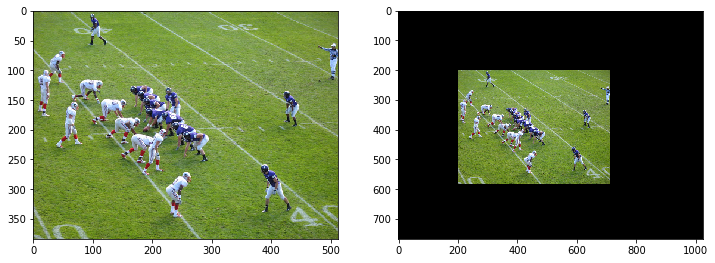

In [4]:
# ASSIGNMENT 1
image = cv2.imread(images_path + 'football.jpg', -1)
print(image.shape)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
tx = 200
ty = 200
M = np.asarray([[1, 0, tx],[0, 1, ty], [0, 0, 1]], dtype=np.float64)
image2 = cv2.warpPerspective(image,M,(2*image.shape[1],2*image.shape[0]))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(image2)

**<span style="color: blue;">LEVEL 2: Euclidean transformation</span>**$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} cos(\theta) &amp; -sin(\theta) &amp; t_x \\ sin(\theta) &amp; cos(\theta) &amp; t_y \\ 0 &amp; 0 &amp; 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}cos(\theta)x - sin(\theta)y + t_x \\ sin(\theta)x + cos(\theta)y  + t_y \\ 1 \end{bmatrix}\\[5pt]$$

As we saw in the previous notebook, this homography applies **rotation + translation**.  
*Note that rotation is around the origin of coordinates (0,0), which is the top-left corner of the image.*  

**<span style="color: red;">ASSIGNMENT 2 -- </span>** 

Repeat the previous exercise using an Euclidean transformation.

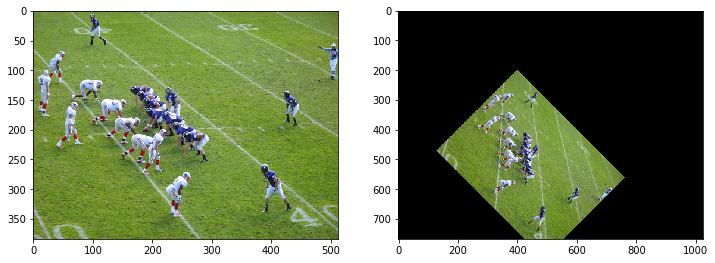

In [5]:
# ASSIGNMENT 2
image = cv2.imread(images_path + 'football.jpg', -1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
tx = 400
ty = 200
theta = pi/4
M = np.asarray([[cos(theta), -sin(theta), tx],[sin(theta), cos(theta), ty], [0, 0, 1]], dtype=np.float64)
image2 = cv2.warpPerspective(image,M,(2*image.shape[1],2*image.shape[0]))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(image2)

**<span style="color: blue;">LEVEL 3: Similarity</span>**$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} s &amp; 0 &amp; 0 \\ 0 &amp; s &amp; 0 \\ 0 &amp; 0 &amp; 1 \end{bmatrix}\begin{bmatrix} cos(\theta) &amp; -sin(\theta) &amp; t_x \\ sin(\theta) &amp; cos(\theta) &amp; t_y \\ 0 &amp; 0 &amp; 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} s\cdot cos(\theta) &amp; -s\cdot sin(\theta) &amp; s\cdot t_x \\ s\cdot sin(\theta) &amp; s\cdot cos(\theta) &amp; s\cdot t_y \\ 0 &amp; 0 &amp; 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}s\cdot (cos(\theta)x - sin(\theta)y + t_x) \\ s\cdot (sin(\theta)x + cos(\theta)y  + t_y) \\ 1 \end{bmatrix}\\[5pt]$$

This homography applies **rotation + translation + scale**.  
*Note that scale have to be equal for axes $x$ and $y$.*  

**<span style="color: red;">ASSIGNMENT 3 -- </span>** 

Repeat the previous exercise using a similarity transformation.

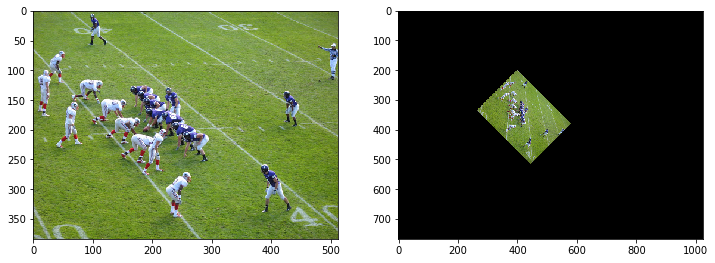

In [6]:
# ASSIGNMENT 3
image = cv2.imread(images_path + 'football.jpg', -1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
tx = 400
ty = 200
theta = pi/4
s=0.5
M = np.asarray([[s*cos(theta), s*-sin(theta), tx],[s*sin(theta), s*cos(theta), ty], [0, 0, 1]], dtype=np.float64)
image2 = cv2.warpPerspective(image,M,(2*image.shape[1],2*image.shape[0]))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(image2)

**<span style="color: blue;">LEVEL 4: Affine</span>**$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} &amp; h_{01} &amp; h_{02} \\ h_{10} &amp; h_{11} &amp; h_{12}\\ 0 &amp; 0 &amp; 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}h_{00}x + h_{01}y + h_{02}\\ h_{10}x + h_{11}y + h_{12}\\ 1 \end{bmatrix}\\[5pt]$$

This is a interesting homography because it appears quite often in real life (e.g. when the depth variation within the planar object is quite small compared to the distance between the camera and the object):$\\[10pt]$

<img src="./images/affine.png" width="300">$\\[5pt]$

We can deffine it as a **rotation + translation + scale (different for each axis)** transform.

**<span style="color: red;">ASSIGNMENT 4 -- </span>** 

Repeat the previous exercise using an affine transformation.

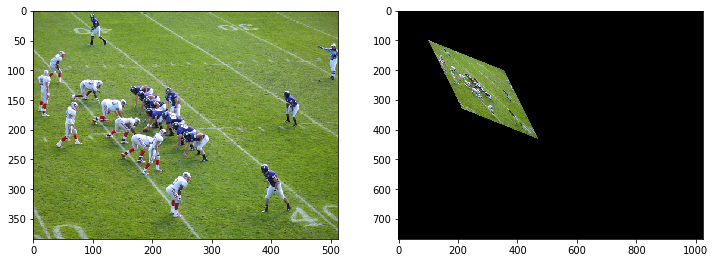

In [7]:
# ASSIGNMENT 4
image = cv2.imread(images_path + 'football.jpg', -1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h00=0.5
h01=0.3
h02=100
h10=0.2
h11=0.6
h12=100
M = np.asarray([[h00, h01, h02],[h10, h11, h12], [0, 0, 1]], dtype=np.float64)
image2 = cv2.warpPerspective(image,M,(2*image.shape[1],2*image.shape[0]))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(image2)

**<span style="color: blue;">LEVEL 5: Projective</span>**$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} &amp; h_{01} &amp; h_{02} \\ h_{10} &amp; h_{11} &amp; h_{12}\\ h_{20} &amp; h_{21} &amp; 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}h_{00}x + h_{01}y + h_{02}\\ h_{10}x + h_{11}y + h_{12}\\ h_{20}x + h_{21}y + 1 \end{bmatrix}\\[5pt]$$

And we have reached the top level: The projective transformation is the general 2D homography since there are no constraints. Unlike the affine transformation, projective tranfomations appear in real life when variation in depth is comparable to distance from the camera to an object:$\\[10pt]$

<img src="./images/comparison_projective.png" width="650">$\\[5pt]$

*Note that we used $h_{22}=1$ for fixing the scale factor in linear transformations. This constraint can be replaced with $\textbf{||h|| = 1}$ (better).*  

Projective transformation is a very poweful tool, and it has many applications, **see the following example.**

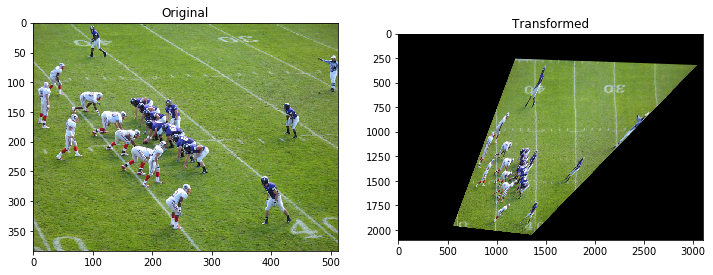

In [8]:
# Define transformation matrix
M = np.array([[3.1654,0.03225,1191.14702],[0.0799604,10.2911,263.9896],[-0.00014621,0.00300344,1]], dtype=np.float64)

# Apply homography
transformed = cv2.warpPerspective(image, M, (3100,2100))

# Show the resulting image
plt.subplot(121)
plt.title("Original")
plt.imshow(image)
plt.subplot(122)
plt.title("Transformed")
plt.imshow(transformed)

As you can see, the perspective of the image has been **removed** and the resultant image is *like* an image taken from the air.

But, you can see that the coefficient of the employed matrix are not some randomly picked numbers, so how can you obtain the specific matrix `M` that is able to do this? The short answer is from a set of corresponding points (rings any bell?). And going one step further: **How can a matrix `M` be obtained having pairs of correspondences**?  

Just as a preview, in the example above, we have used the four corners of the rectangle that the white lines are forming and we have made them corresponded with an actual rectangle without perspective. Do not worry, we will explain this later, but first let's have a look at the maths behind this.

## 6.2.2 Solving the homography 2D: Direct Lineal Transformation (DLT)

As you know, a general 2D homography that converts a point $p=(x,y)$ to another point $p'=(x',y')$ looks like this (in homogeneous coordinates):$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} &amp; h_{01} &amp; h_{02} \\ h_{10} &amp; h_{11} &amp; h_{12}\\ h_{20} &amp; h_{21} &amp; 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix}$$

If we know the coordinates of the corresponding points, we can build an equation system to solve the coefficients of the matrix. Furthermore, knowing a certain amount of corresponding points that share the same homography will allow us to get a(n) (over)determined equation system to get them.  

In this case, from a certain pair of points $i$, we can form a linear equation system in order to isolate the matrix variables:$\\[5pt]$

$$\begin{eqnarray}
x'_i = \frac{h_{00}x_i + h_{01}y_i + h_{02}}{h_{20}x_i + h_{21}y_i + 1}\  \longrightarrow \ x'_i(h_{20}x_i + h_{21}y_i + 1) = h_{00}x_i + h_{01}y_i + h_{02} \\[10pt]
y'_i = \frac{h_{10}x_i + h_{11}y_i + h_{12}}{h_{20}x_i + h_{21}y_i + 1}\ \longrightarrow \ y'_i(h_{20}x_i + h_{21}y_i + 1) = h_{10}x_i + h_{11}y_i + h_{12}
\end{eqnarray}
$$
$\\[10pt]$
$$A\mathbf{h} = 0 \longrightarrow
\begin{bmatrix}
-x_i &amp; -y_i &amp; -1 &amp; 0 &amp; 0 &amp; 0 &amp; x'_ix_i &amp; x'_iy_i &amp; x'_i \\
0 &amp; 0 &amp; 0 &amp; -x_i &amp; -y_i &amp; -1 &amp; y'_ix_i &amp; y'_iy_i &amp; y'_i
\end{bmatrix} 
\begin{bmatrix}
h_{00} \\ h_{01} \\ h_{02} \\ h_{10} \\ h_{11} \\ h_{12} \\ h_{20} \\ h_{21} \\ 1
\end{bmatrix} 
=
\begin{bmatrix}
0 \\ 0 
\end{bmatrix} 
\\[5pt]
$$

You can see that with less than 4 independent points ($rank(A) \lt 8$), there are infinitely many solutions behind $k\textbf{h}$.

But, if we have **4 or more independent pair of points**:$\\[5pt]$

$$Ah = 0 \longrightarrow
\begin{bmatrix}
-x_1 &amp; -y_1 &amp; -1 &amp; 0 &amp; 0 &amp; 0 &amp; x'_1x_1 &amp; x'_1y_1 &amp; x'_1 \\
0 &amp; 0 &amp; 0 &amp; -x_1 &amp; -y_1 &amp; -1 &amp; y'_1x_1 &amp; y'_1y_1 &amp; y'_1 \\
&amp; &amp; &amp; &amp;\vdots \\
-x_n &amp; -y_n &amp; -1 &amp; 0 &amp; 0 &amp; 0 &amp; x'_nx_n &amp; x'_ny_n &amp; x'_n \\
0 &amp; 0 &amp; 0 &amp; -x_n &amp; -y_n &amp; -1 &amp; y'_nx_n &amp; y'_ny_n &amp; y'_n \\
\end{bmatrix} 
\begin{bmatrix}
h_{00} \\ h_{01} \\ h_{02} \\ h_{10} \\ h_{11} \\ h_{12} \\ h_{20} \\ h_{21} \\ 1
\end{bmatrix} 
= 
\begin{bmatrix}
0 \\0\\ \vdots \\ 0 \\ 0
\end{bmatrix} 
$$


- For $\textbf{n = 4}$ **independent pair of points** ($rank(A) = 8$), there is a solution $k\textbf{h}$ with $\textbf{h} \ne 0, k \ne 0$. This should be sufficient (and strictly speaking it is, as we will test later), but the solution will be highly affected by the noise in the points coordinates, so this is not usually used for automatically detected oints, but for manually chosen ones.$\\[5pt]$
- For $\textbf{n &gt; 4}$ **independent pair of points** ($rank(A) \gt 8$), (for instance, those detected by any keypoint detector) the system is inconsistent (i.e. there is not a solution), apart from $\textbf{h} = 0$, as the system is overdetermined, but we can get the best solution that **minimizes the error in the points coordinates**, that is, the least-squares solution: $\\[5pt]$

    - Arg. min$_h ||\textbf{Ah}||^2$ with $||\textbf{h}|| = 1$$\\[5pt]$
    - Solution $\hat{h}$: eigenvector of the smallest eigenvalue of $A^TA$
    
On the other hand, note that if you know the specific type of the transformation, the minimum number of points you will need to solve this equation system varies:

- **Translation** (2 unknowns) $\rightarrow$ **1 pair of points needed**
- **Euclidean** (3 unknowns) $\rightarrow$ **2 pair of points needed**
- **Similarity** (4 unknowns) $\rightarrow$ **2 pair of points needed**
- **Affine** (6 unknowns) $\rightarrow$ **3 pair of points needed**
- **Projective** (8 unknowns) $\rightarrow$ **4 pair of points needed**

But, as mentioned before, you will usually need many more points for noise roboustness, so this lower bound is just theoretical and often overoptimistic.

Finally, the following table indicates which transformations involves each type of transformation as well as the elements that remain invariant after the transformation:$\\[10pt]$

<table>
<tbody>
<tr style="height: 23px; border: 1px solid black;">
<th style="height: 23px; border: 1px solid black;"> 
</th><th style="height: 23px; border: 1px solid black;">Euclidean 
</th><th style="height: 23px; border: 1px solid black;"> Similarity
</th><th style="height: 23px; border: 1px solid black;"> Affine
</th><th style="height: 23px; border: 1px solid black;"> Projective
</th></tr>
<tr style="height: 23px; border: 1px solid black;">
<th style="height: 23px; border: 1px solid black;"> Transformations:
</th><td style="height: 23px;"> </td>
<td style="height: 23px;"> </td>
<td style="height: 23px;"> </td>
<td style="height: 23px;"> </td>
</tr>
<tr style="height: 23px; border: 1px solid black;">
<td style="height: 23px; border: 1px solid black;"> Rotation, translation</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
</tr>
<tr style="height: 23px; border: 1px solid black;">
<td style="height: 23px; border: 1px solid black;"> Isotropic scale</td>
<td style="height: 23px; border: 1px solid black;"> </td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
</tr>
<tr style="height: 23px; border: 1px solid black;">
<td style="height: 23px; border: 1px solid black;"> Axes scale</td>
<td style="height: 23px; border: 1px solid black;"> </td>
<td style="height: 23px; border: 1px solid black;"> </td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
</tr>
<tr style="height: 23px; border: 1px solid black;">
<td style="height: 23px; border: 1px solid black;"> Perspective transformation</td>
<td style="height: 23px; border: 1px solid black;"> </td>
<td style="height: 23px; border: 1px solid black;"> </td>
<td style="height: 23px; border: 1px solid black;"> </td>
<td style="height: 23px; border: 1px solid black;"> x</td>
</tr>
<tr style="height: 23px; border: 1px solid black;">
<th style="height: 23px; border: 1px solid black;"> Invariants:
</th><td style="height: 23px;"> </td>
<td style="height: 23px;"> </td>
<td style="height: 23px;"> </td>
<td style="height: 23px;"> </td>
</tr>
<tr style="height: 23px; border: 1px solid black;">
<td style="height: 23px; border: 1px solid black;"> Distance</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> </td>
<td style="height: 23px; border: 1px solid black;"> </td>
<td style="height: 23px; border: 1px solid black;"> </td>
</tr>
<tr style="height: 23px; border: 1px solid black;">
<td style="height: 23px; border: 1px solid black;"> Angles, distance ratios</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> </td>
<td style="height: 23px; border: 1px solid black;"> </td>
</tr>
<tr style="height: 23px; border: 1px solid black;">
<td style="height: 23px; border: 1px solid black;">Parallelism, mass center</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> </td>
</tr>
<tr style="height: 23px; border: 1px solid black;">
<td style="height: 23px; border: 1px solid black;"> Cross-ratio</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
<td style="height: 23px; border: 1px solid black;"> x</td>
</tr>
</tbody>
</table>

Thus, for instance, an Euclidean homography involves just a rotation and a translation, and keeps distance, angles, distance ratios, parallelism, mass center and cross-ratio invariant, while a projective transformation involves all shorts of transformations and only mantain the cross-ratio unchanged.

Now that we know how to determine the coefficients of a certain 2D homography, let's go back to our american football problem and apply this.

We are going to work with the image `football-big.jpg`, which is the same than the one used in previous exercises but with a better resolution and quality.

**<span style="color: red;">ASSIGNMENT 5a -- </span>** 

First, read and show the color image

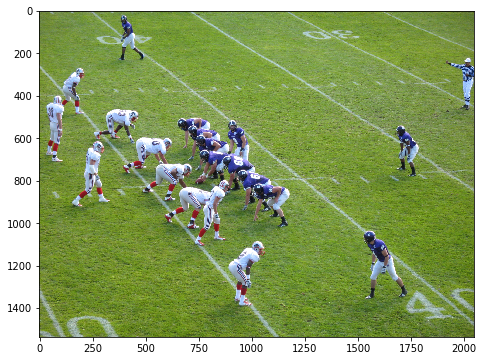

In [9]:
# ASSIGNMENT 5b
image = cv2.imread(images_path + 'football-big.jpg', -1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Our first task is to add the image `marker.jpg` to the field. 

<img src="./images/marker.jpg" width="150">$\\[5pt]$

For adding an image without perspective to an image with perspective, the first step is to **remove the perspective** of the original image, and for that we are going to *map* the points of a rectangle on the field to **an actual rectangle**, but keeping the ratio of the sides' lengths of the rectangle (remember that a projective transformation is only invariant to the cross-ratio distances!):

<img src="./images/points-homography.png" width="800">$\\[5pt]$

Now we have four (manually selected) corresponding points, we are going to compute the transformation matrix of that projective homography. This is easy in openCV, as we have [cv2.findHomography](https://docs.opencv.org/4.2.0/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780). This method takes two lists of corresponding points as input: the first list contains the input coordinates $(x_i,y_i)$ and the second list their correspondences $(x'_i,y'_i)$.

*Note that those points represent coordinates, their format is $(n\_col, n\_row)$*.

**<span style="color: red;">ASSIGNMENT 5b -- </span>** 

Take the **four corners of the specified rectangle** (you can use an external tool to get the coordinates) and obtain the transformation matrix that removes the perpective of the football field. Then **use `warpPerspective` with the obtained matrix** to remove the perspective and **show the image** and save it into your computer because we will need it for the next exercise.

*Remember that the output rectangle shoul maintain the ratio of the original football field ($10\ /\ 6.16$) when you define the list of the correspondent points, and for computation purposes use numbers that are "similar".*

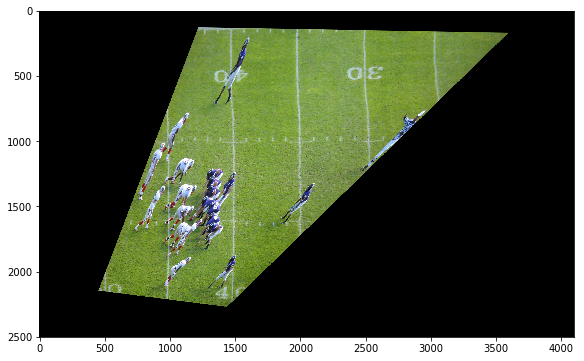

In [10]:
# ASSIGNMENT 5b

listap1 = np.asarray([(137, 393),(533, 835),(1287, 359),(1909, 757)])
listap2 = np.asarray([(1000,1000),(1000, 1616), (2000,1000), (2000,1616)])
M = cv2.findHomography(listap1, listap2)
transformed = cv2.warpPerspective(image, M[0], (2*image.shape[1], 2500))
plt.imshow(transformed)

Now that we have the field without perspective, we can add the marker to the image in any place.

As we want to **add the start and down line in the original image**, we need to **take two points for each line in this image** (note that now the lines are vertical lines, so take points with the same $x$ coordinate for both lines). In the next exercise we will apply inverse homography to those points so it will be possible to draw the line in the original image. **The down line should be at 3 yards of the start line** (each small vertical segment marks one yard).

**<span style="color: red;">ASSIGNMENT 5c -- </span>** 

Add the marker to the image without perspective and show it, also take the points mentioned before. The resulting image should look like this:$\\[5pt]$

<img src="./images/marker-example.png" width="600">$\\[5pt]$

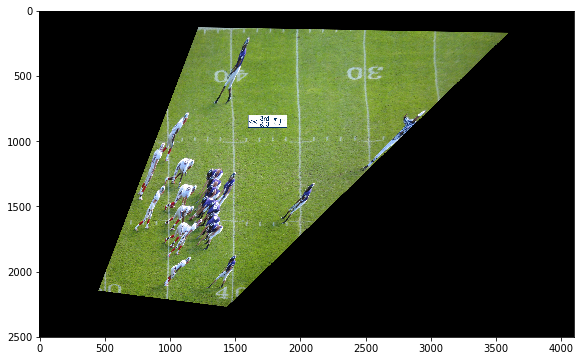

In [11]:
# ASSIGNMENT 5c
marker = cv2.imread(images_path + 'marker.jpg', -1)
marker = cv2.cvtColor(marker, cv2.COLOR_BGR2RGB)
transformed[800:900, 1600:1900] = marker
plt.imshow(transformed)

It's time to bring back the perspective, for that **apply homography using the inverse of the transformation matrix**:

$$\lambda \begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} &amp; h_{01} &amp; h_{02} \\ h_{10} &amp; h_{11} &amp; h_{12}\\ h_{20} &amp; h_{21} &amp; 1 \end{bmatrix}^{-1}\begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix}$$

**<span style="color: red;">ASSIGNMENT 5d -- </span>** 

Compute the inverse of the transformation matrix using [numpy.linalg.inv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html), and bring back the perspective to the image with the marker using the new homography and show it.

*Now, you should see the marker having the same perspective than the original image.*

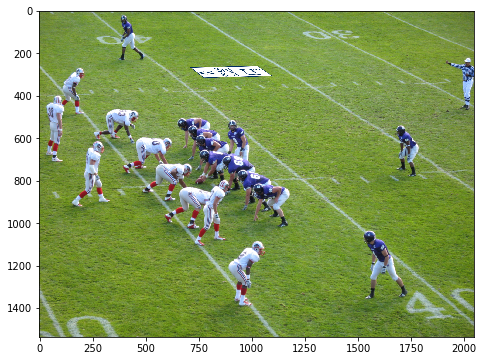

In [12]:
# ASSIGNMENT 5d
Minv=np.linalg.inv(M[0])
transformed2 = cv2.warpPerspective(transformed, Minv, (image.shape[1], image.shape[0]))
plt.imshow(transformed2)

Finally, its time to **draw the lines**. You should have saved the coordinates of two points for each line in the image without perspective.

For homography of lines, you just need to **apply the homography to two points of the line**. In that way, you will have two points in the original image defining the line.

Note that `cv2.line` has two points as input, but only draws the segment line. You will have to **extend that segment** using the slope of the line.

$$slope = \frac{y_2-y_1}{x_2-x_1}$$

The new points will be:

$$\begin{eqnarray}
x'_1,\ \  y'_1 = x_1 + extension,\ \ y_1 + extension\times slope\\[3pt]
x'_2,\ \  y'_2 = x_2 - extension,\ \  y_2 - extension\times slope
\end{eqnarray}$$

**<span style="color: red;">ASSIGNMENT 5e -- </span>** 

Apply the **inverse homography** to the line points, **extend** the line segment and **draw** the start line (blue) and the down line (blue). Finally, show the resulting image.

This resulting image should look like this:$\\[5pt]$

<img src="./images/result.png" width="400">$\\[5pt]$

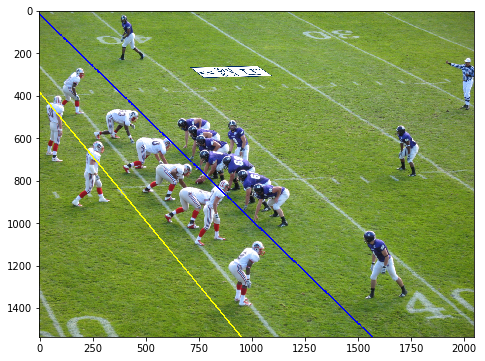

In [13]:
# ASSIGNMENT 5e
#Linea 1
p1 = (900, 2000,1)
p2 = (900, 1500,1)

p1= Minv@p1
p2= Minv@p2

p1 = (np.int(p1[0]/p1[2]), np.int(p1[1]/p1[2]))
p2 = (np.int(p2[0]/p2[2]), np.int(p2[1]/p2[2]))

slope= (p2[1] - p1[1])/(p2[0] - p1[0])
extension=1500

p1 = (p1[0]+extension, p1[1]+extension*slope)
p2 = (p2[0]-extension, p2[1]-extension*slope)

p1 = (np.int32(p1[0]), np.int32(p1[1]))
p2 = (np.int32(p2[0]), np.int32(p2[1]))
lines1=cv2.line(transformed2,p1,p2,(255, 255, 0),5)


#Linea 2
p1 = (1200,900,1)
p2 = (1200,1600,1)

p1= Minv@p1
p2= Minv@p2

p1 = (np.int(p1[0]/p1[2]), np.int(p1[1]/p1[2]))
p2 = (np.int(p2[0]/p2[2]), np.int(p2[1]/p2[2]))

slope= (p2[1] - p1[1])/(p2[0] - p1[0])

p1 = (p1[0]+extension, p1[1]+extension*slope)
p2 = (p2[0]-extension, p2[1]-extension*slope)

p1 = (np.int(p1[0]), np.int(p1[1]))
p2 = (np.int(p2[0]), np.int(p2[1]))
lines2=cv2.line(lines1,p1,p2,(0, 0, 255),5)
plt.imshow(lines1)


## 6.2.3 When can a homography be applied?

We have applied a homography to this football field because it is a transformation **between planes**, but if you look to the top player in the *aerial* image, you can see that the transformation is not good at all. So, we need to know when can we apply a homography. 

It can be said that there is a homography $H_{3\times3}$ between points in these 3 cases:

<img src="./images/applications.png" width="800">

In this exercise we have had a **still camera** and we have transformed a image plane to another. Since the players are not in the same plane that the football field, the homography is not valid for those points.

On the other hand, there is also an homography **for a rotating camera observing a non-planar scene**. Actually, this would the next step for **image stitching** after computing matches with keypoints in the example application in Chapter 4. We already have the correspondences either using Harris or SIFT, so the homography should be easy to obtain.$\\[5pt]$

<img src="./images/stitching.png" width="800">$\\[5pt]$

Finally, there are a homography for a **moving camera observing a plane**. This is the typical case of 2 images of a painting taken from different positions:$\\[5pt]$

<img src="./images/painting.png" width="400">

## Conclusion

Fantastic work! Homographies are a very important tool in computer vision. In this notebook you have

- learnt what a homography is, how to solve it and how to apply it.
- learnt when a homography can be used.
- applied homographies to lines.
- learnt some homography applications that are currently being used in american football (and other sports too! think about placing advertising on a tennis or footbal court).